## **ANDERSON KENEDY CAMARA ROJAS**

# **KILOMETROS a MILLAS**

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Datos para entrenar (kilómetros y su equivalente en millas)
x_train = np.array([0, 1, 5, 10, 50, 100, 200], dtype=float)
y_train = np.array([0, 0.621371, 3.106855, 6.21371, 31.06855, 62.1371, 124.2742], dtype=float)

# Crear el modelo
model = Sequential([
    Dense(units=1, input_shape=[1], activation='linear')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
print("Entrenando el modelo...")
model.fit(x_train, y_train, epochs=500, verbose=0)
print("Modelo entrenado.")

# Probar el modelo
kms = 150  # Ejemplo de entrada
prediccion = model.predict(np.array([kms])) # Convert kms to a NumPy array
print(f"{kms} kilómetros son aproximadamente {prediccion[0][0]} millas.")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Entrenando el modelo...
Modelo entrenado.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
150 kilómetros son aproximadamente 26.035776138305664 millas.


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1556 - val_loss: 1.6229
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0062 - val_loss: 0.9260
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0067 - val_loss: 0.0338
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0045 - val_loss: 0.0650
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0034 - val_loss: 0.2922
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0043 - val_loss: 0.0195
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0029 - val_loss: 0.2818
Epoch 8/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0029 - val_loss: 0.0355
Epoch 9/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0030 - val_loss: 0.0591
Epoch 10/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0028 - val_loss: 0.1175
Epoch 11/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0031 - val_loss: 0.0129
Epoch 12/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

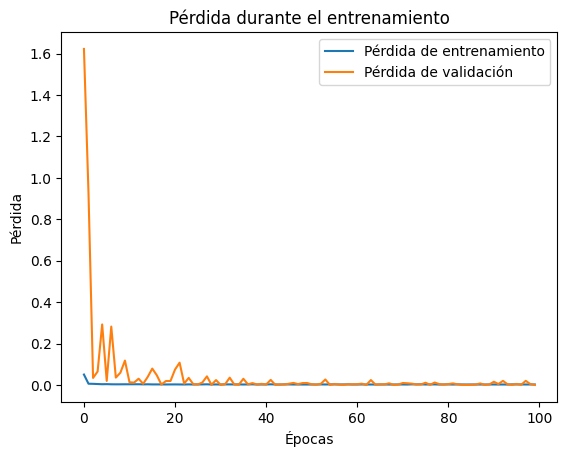

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from sklearn.preprocessing import MinMaxScaler

# Generar un rango más amplio de datos de entrenamiento: Kilómetros (entradas)
km = np.linspace(1, 5000, 5000, dtype=float)  # Kilómetros de 1 a 5000
millas = km * 0.621371  # Conversión a millas

# Normalizar los datos con MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
km_normalizado = scaler.fit_transform(km.reshape(-1, 1))
millas_normalizado = scaler.fit_transform(millas.reshape(-1, 1))

# Crear el modelo de la red neuronal
model = Sequential()

# Capa oculta 1: 64 neuronas con activación 'relu'
model.add(Dense(64, input_dim=1, activation='relu'))
model.add(BatchNormalization())  # Normalización de la capa oculta

# Capa oculta 2: 128 neuronas con activación 'relu'
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())

# Capa oculta 3: 64 neuronas con activación 'relu'
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())

# Capa de salida: 1 neurona para la predicción en millas
model.add(Dense(1))

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
history = model.fit(km_normalizado, millas_normalizado, epochs=100, batch_size=32, validation_split=0.2)

# Evaluar el modelo
loss = model.evaluate(km_normalizado, millas_normalizado)
print(f'Pérdida final: {loss}')

# Realizar una predicción para 150 km
km_test = np.array([150], dtype=float)
km_test_normalizado = scaler.transform(km_test.reshape(-1, 1))
millas_pred_normalizado = model.predict(km_test_normalizado)
millas_pred = scaler.inverse_transform(millas_pred_normalizado)

print(f"150 kilómetros es aproximadamente {millas_pred[0][0]:.2f} millas.")

# Graficar la pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()
